In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**There are 10 different classes of images, as following:**

* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot.

In [2]:
import keras
from keras.datasets import fashion_mnist

In [3]:
# Load the fashion-mnist data
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,  67,   0,
          0,   0,   0,  50,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 120, 209, 226, 247, 237,
        255, 255, 255, 247, 238, 235, 172,  72,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 137, 239, 252, 243, 234, 229, 238,
        244, 246, 240, 230, 232, 239, 248, 251, 194,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 102, 255, 231, 228, 227, 228, 233, 230,
        230, 229, 228, 232, 232, 231, 227, 224, 252, 179,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 233, 241, 229, 231, 255, 255, 238, 231,
        227, 238, 246, 228, 230, 227, 234, 235, 229, 241,  20,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 248, 241, 231, 255, 149,  47, 252, 228,
        255, 242, 216, 238, 232, 255, 228, 220, 234, 250,  54,   0,   0,
          0,   0],
       [  

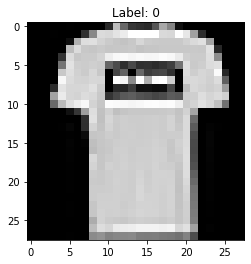

In [7]:
plt.imshow(np.reshape(X_train[1], (28,28)), cmap = 'gray')
plt.title("Label: %i" %Y_train[1])
plt.show()

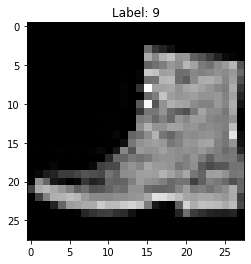

In [8]:
plt.imshow(np.reshape(X_train[650], (28,28)), cmap = 'gray')
plt.title("Label: %i" %Y_train[650])
plt.show()

In [9]:
Y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
# Denine Labels 

fashion_labels = ['T-shirt/top',
                  'Trouser',
                  'Pullover',
                  'Dress',
                  'Coat',
                  'Sandal',
                  'Shirt',
                  'Sneaker',
                  'Bag',
                  'Ankle boot']

**Processing Image**

In [11]:
# Image pixel Normalization
X_train = X_train.astype('float32')/255

In [12]:
X_test = X_test.astype('float32')/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Image Transformation**

In [14]:
image_height=28
image_width=28

# Grayscale image with num_channels (Rank = 1)
num_channels = 1

# Reshaping of Image = (60000, 28, 28, 1)
train_digits = np.reshape(X_train, newshape=(60000, image_height, image_width, num_channels))

In [15]:
test_digits = np.reshape(X_test, newshape=(10000, image_height, image_width, num_channels))

**Target O/P to Categorical O/P**

In [16]:
# 0 - 9 num_classes = 10
# 7 - [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
# 5 - [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

from keras.utils import to_categorical
num_classes = 10
train_labels_class = to_categorical(Y_train, num_classes)

In [17]:
test_labels_class = to_categorical(Y_test, num_classes)

In [18]:
train_labels_class

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**CNN Model**

In [19]:
from keras.models import Sequential
# Convo 1D - CSV (ECG, Audio, Signals, CSV), Convo 2D & Convo 3D (Image)
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [20]:
def build_model():
  model = Sequential()

  # Layer - I (Padding = 'same' --> zero padding)
  model.add(Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu', 
                   input_shape = (image_height, image_width, num_channels)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 128, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Flatten Matrix
  model.add(Flatten())

  # Fully Connected Layer
  model.add(Dense(units=128, activation='relu'))

  # Output Layer
  model.add(Dense(units=10, activation='softmax'))

  # Model Compile
  optimizers = Adam(learning_rate=0.001)

  # categorical_crossentropy - used for multiclass classification
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
  return model

In [21]:
model = build_model()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [23]:
history = model.fit(train_digits, train_labels_class, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 3s 4ms/step - loss: 0.4861 - accuracy: 0.8231 - val_loss: 0.3218 - val_accuracy: 0.8815
Epoch 2/15
844/844 [==============================] - 3s 3ms/step - loss: 0.3027 - accuracy: 0.8891 - val_loss: 0.2780 - val_accuracy: 0.9035
Epoch 3/15
844/844 [==============================] - 3s 3ms/step - loss: 0.2549 - accuracy: 0.9070 - val_loss: 0.2482 - val_accuracy: 0.9080
Epoch 4/15
844/844 [==============================] - 3s 3ms/step - loss: 0.2235 - accuracy: 0.9183 - val_loss: 0.2477 - val_accuracy: 0.9093
Epoch 5/15
844/844 [==============================] - 3s 3ms/step - loss: 0.1997 - accuracy: 0.9255 - val_loss: 0.2409 - val_accuracy: 0.9122
Epoch 6/15
844/844 [==============================] - 3s 4ms/step - loss: 0.1786 - accuracy: 0.9343 - val_loss: 0.2129 - val_accuracy: 0.9225
Epoch 7/15
844/844 [==============================] - 3s 3ms/step - loss: 0.1602 - accuracy: 0.9407 - val_loss: 0.2352 - val_accuracy: 0.9150
Epoch 

In [24]:
model.evaluate(test_digits, test_labels_class)

313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.9209


[0.3366096615791321, 0.9208999872207642]

In [25]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.486121,0.823148,0.321782,0.881500
1,0.302731,0.889148,0.278000,0.903500
2,0.254852,0.906963,0.248210,0.908000
3,0.223547,0.918296,0.247658,0.909333
4,0.199666,0.925481,0.240892,0.912167
5,0.178619,0.934259,0.212913,0.922500
6,0.160218,0.940685,0.235187,0.915000
7,0.141644,0.946685,0.224429,0.919167
8,0.123559,0.953463,0.228300,0.924833
9,0.109912,0.958444,0.236678,0.921167


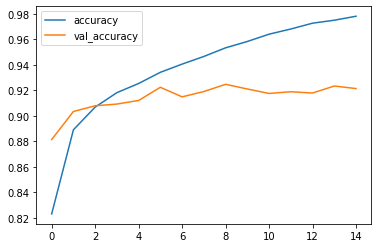

In [31]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

**CNN With Dropout**
* To avoid overfitting of model

In [38]:
from keras.layers import Dropout

In [39]:
def build_model():
  model2 = Sequential()

  # Layer - I (Padding = 'same' --> zero padding)
  model2.add(Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu', 
                   input_shape = (image_height, image_width, num_channels)))
  model2.add(MaxPooling2D(pool_size=(2,2)))
  model2.add(Dropout(0.25))

  model2.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
  model2.add(MaxPooling2D(pool_size=(2,2)))
  model2.add(Dropout(0.25))

  model2.add(Conv2D(filters = 128, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
  model2.add(MaxPooling2D(pool_size=(2,2)))
  model2.add(Dropout(0.25))

  # Flatten Matrix
  model2.add(Flatten())

  # Fully Connected Layer
  model2.add(Dense(units=128, activation='relu'))
  model2.add(Dropout(0.30))

  # Output Layer
  model2.add(Dense(units=10, activation='softmax'))

  # Model Compile
  optimizers = Adam(learning_rate=0.001)

  # categorical_crossentropy - used for multiclass classification
  model2.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
  return model2

In [40]:
model2 = build_model()

In [41]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)        

In [42]:
result = model2.fit(train_digits, train_labels_class, epochs=50, batch_size=64, validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 3s 4ms/step - loss: 0.6179 - accuracy: 0.7720 - val_loss: 0.3620 - val_accuracy: 0.8630
Epoch 2/50
844/844 [==============================] - 3s 4ms/step - loss: 0.3887 - accuracy: 0.8577 - val_loss: 0.3032 - val_accuracy: 0.8853
Epoch 3/50
844/844 [==============================] - 3s 4ms/step - loss: 0.3420 - accuracy: 0.8737 - val_loss: 0.2788 - val_accuracy: 0.8960
Epoch 4/50
844/844 [==============================] - 3s 4ms/step - loss: 0.3093 - accuracy: 0.8865 - val_loss: 0.2612 - val_accuracy: 0.8995
Epoch 5/50
844/844 [==============================] - 3s 4ms/step - loss: 0.2894 - accuracy: 0.8939 - val_loss: 0.2444 - val_accuracy: 0.9088
Epoch 6/50
844/844 [==============================] - 3s 4ms/step - loss: 0.2747 - accuracy: 0.8990 - val_loss: 0.2340 - val_accuracy: 0.9095
Epoch 7/50
844/844 [==============================] - 3s 4ms/step - loss: 0.2623 - accuracy: 0.9029 - val_loss: 0.2378 - val_accuracy: 0.9105
Epoch 

In [43]:
model2.evaluate(test_digits, test_labels_class)

313/313 [==============================] - 1s 2ms/step - loss: 0.2180 - accuracy: 0.9243


[0.21800744533538818, 0.9243000149726868]

In [44]:
pd.DataFrame(result.history)

,loss,accuracy,val_loss,val_accuracy
0,0.617894,0.772037,0.361964,0.863000
1,0.388658,0.857685,0.303171,0.885333
2,0.341993,0.873667,0.278751,0.896000
3,0.309251,0.886519,0.261215,0.899500
4,0.289356,0.893944,0.244368,0.908833
5,0.274652,0.898963,0.233980,0.909500
6,0.262261,0.902944,0.237847,0.910500
7,0.249018,0.908593,0.222241,0.917333
8,0.244667,0.910963,0.229907,0.911667
9,0.233278,0.913667,0.217940,0.922000


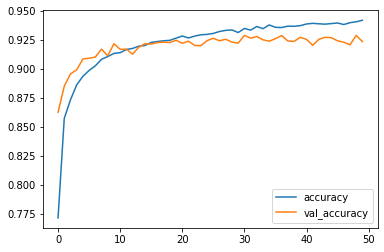

In [45]:
pd.DataFrame(result.history)[['accuracy', 'val_accuracy']].plot()

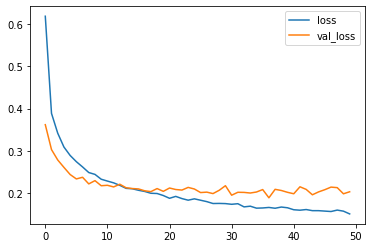

In [47]:
pd.DataFrame(result.history)[['loss',  'val_loss']].plot()

In [133]:
predictions = model2.predict(test_digits)

In [134]:
# Converts Categorical o/p into integar o/p

yhat = np.argmax(predictions, axis = 1)

In [135]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(Y_test, yhat)

array([[858,   0,  21,  11,   2,   1, 105,   0,   2,   0],
       [  0, 989,   1,   6,   1,   0,   2,   0,   1,   0],
       [ 12,   1, 907,   6,  32,   0,  42,   0,   0,   0],
       [ 16,   6,   9, 925,  24,   0,  20,   0,   0,   0],
       [  0,   1,  59,  16, 870,   0,  54,   0,   0,   0],
       [  0,   0,   0,   0,   0, 988,   0,  10,   0,   2],
       [ 94,   0,  57,  24,  48,   0, 774,   0,   3,   0],
       [  0,   0,   0,   0,   0,   4,   0, 979,   0,  17],
       [  1,   0,   0,   3,   1,   3,   3,   0, 989,   0],
       [  1,   0,   0,   0,   0,   4,   0,  31,   0, 964]])

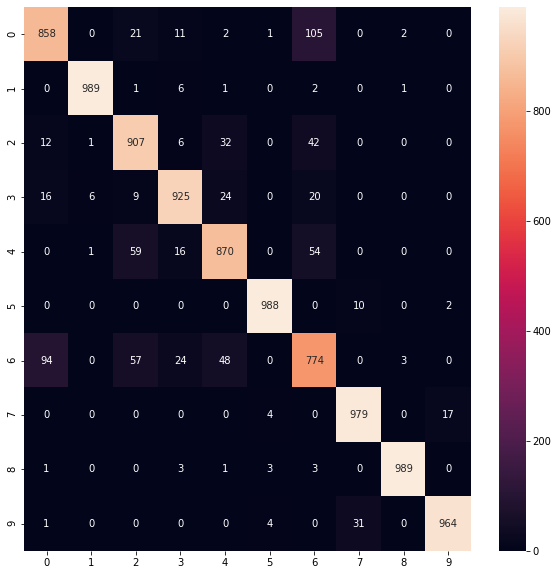

In [136]:
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(Y_test, yhat), annot = True, fmt = '0.0f')

**Prediction**

In [139]:
yhat = np.argmax(model2.predict(np.reshape(test_digits[5], (1, 28, 28, 1))))

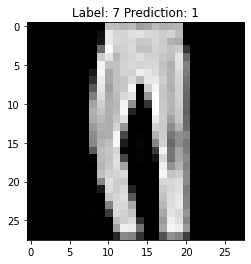

In [140]:
plt.imshow(np.reshape(test_digits[5], (28,28)), cmap = 'gray')
plt.title("Label: %i Prediction: %i" %(Y_train[6], yhat))
plt.show() 

**Make Prediction with New Image**

In [141]:
import cv2

In [142]:
# 0 - Gray Scale

img = cv2.imread('/content/images.jpg', 0)

In [143]:
img.shape

(227, 222)

In [144]:
test_digits.shape

(10000, 28, 28, 1)

In [145]:
img_data = cv2.resize(img, (28, 28))

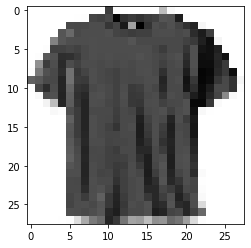

In [146]:
plt.imshow(img_data, cmap = 'gray')

In [147]:
# Bitwise operation not for image samples 
img_data = cv2.bitwise_not(img_data)

In [148]:
img_new = np.reshape(img_data, (1, image_height, image_width, num_channels))

In [149]:
img_new.shape

(1, 28, 28, 1)

In [150]:
model.predict(img_new)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'Predicted O/P :0')

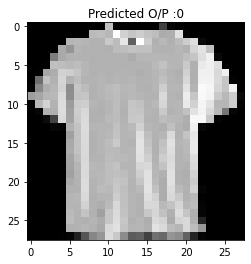

In [152]:
plt.imshow(img_data, cmap = 'gray')
plt.title("Predicted O/P :%i" %np.argmax(model.predict(img_new)))